In [ ]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import norm

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


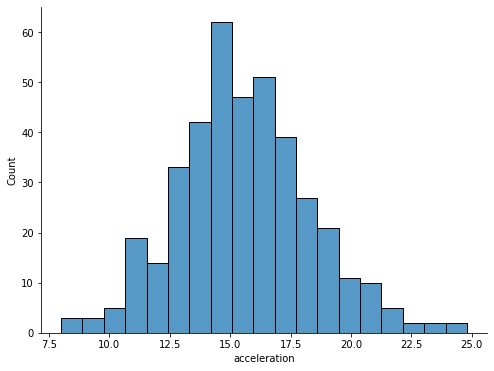

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df)
sns.despine()

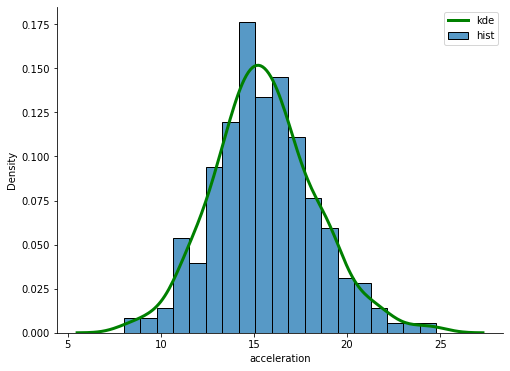

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


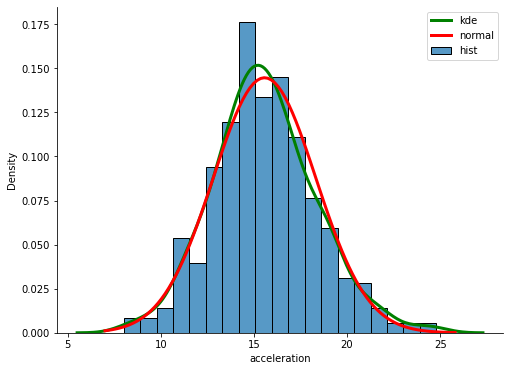

In [ ]:
mu_est = df["acceleration"].mean()
sigma_est = df["acceleration"].std()


fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["acceleration"].min() - 1, df["acceleration"].max() + 1, 100)
y=  norm.pdf(x, mu_est, sigma_est)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="normal")
plt.legend()
sns.despine()


### Gamma

In [ ]:
from scipy.stats import gamma

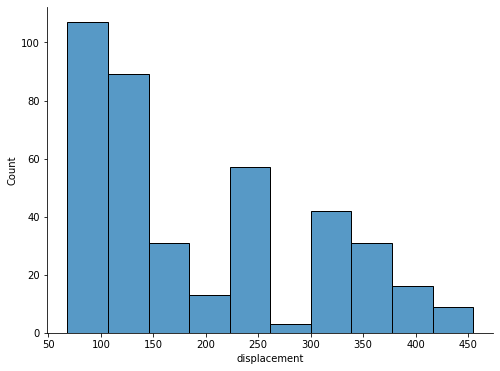

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df)
sns.despine()

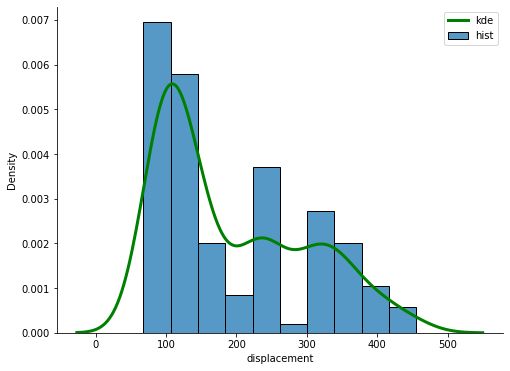

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


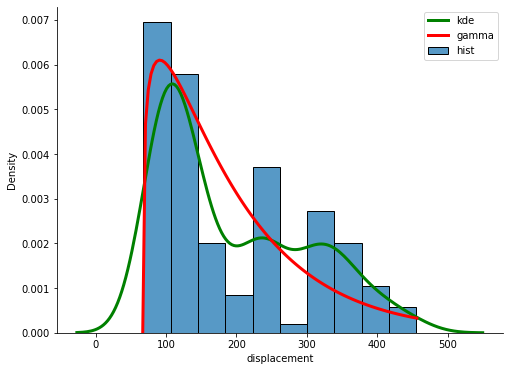

In [ ]:
shape = (df["displacement"].mean() / df["displacement"].std()) ** 2
scale = (df["displacement"].std()**2) / df["displacement"].mean() 
loc = df["displacement"].min()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["displacement"].min() - 1, df["displacement"].max() + 1, 100)

shape, loc, scale = gamma.fit(df["displacement"])
y=  gamma.pdf(x, shape, loc, scale)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="gamma")
plt.legend()
sns.despine()


### Log Normal

In [ ]:
from scipy.stats import lognorm

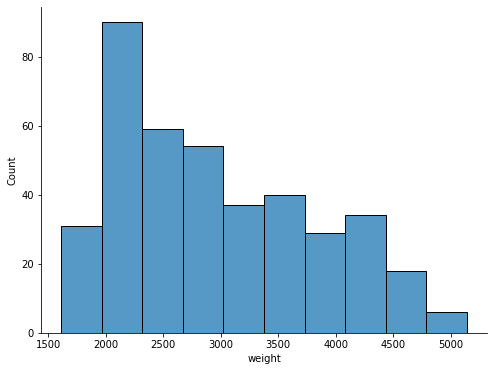

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df)
sns.despine()

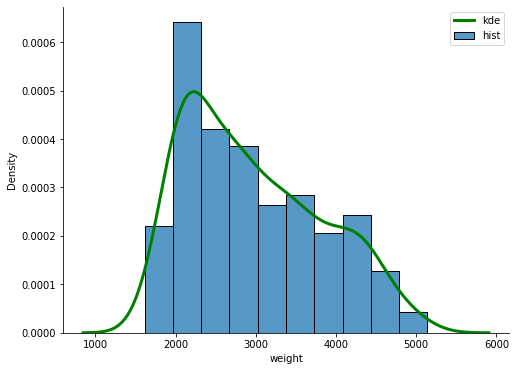

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


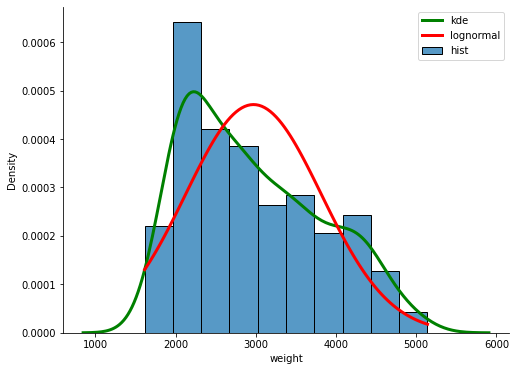

In [ ]:
mu_est = (df["weight"]).mean()
sigma_est = (df["weight"]).std()


fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


In [ ]:
df["weight_norm"] = (df["weight"] - df["weight"].mean()) / df["weight"].std() 

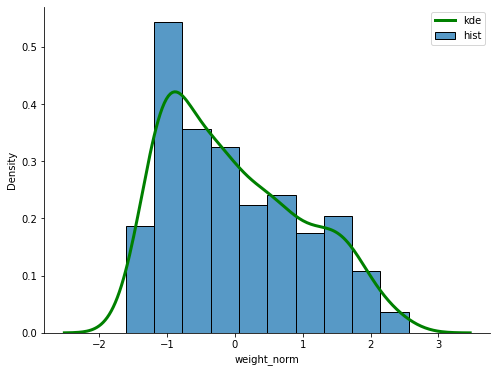

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()


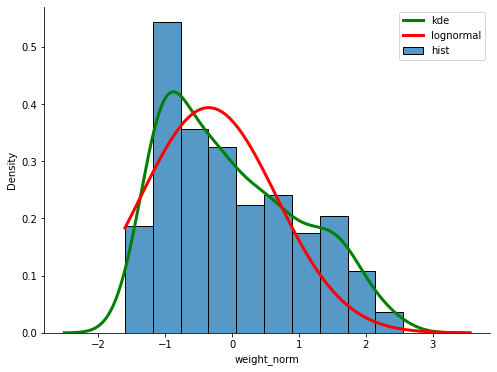

In [ ]:
mu_est = np.log(df["weight_norm"]).mean()
sigma_est = np.log(df["weight_norm"]).std()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight_norm"].min(), df["weight_norm"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


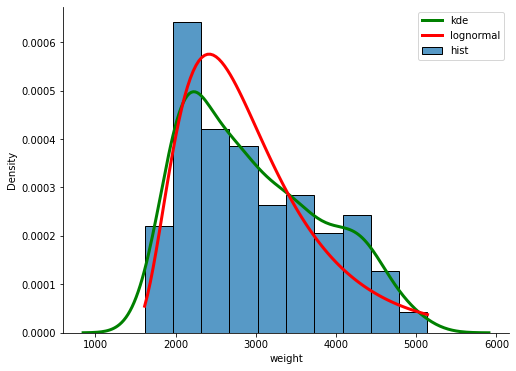

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
shape, loc, scale = lognorm.fit(df["weight"])
y=  (lognorm.pdf(x, shape, loc, scale))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


## Testes de Hipóteses - Explicação
  


In [ ]:
df = sns.load_dataset('iris')

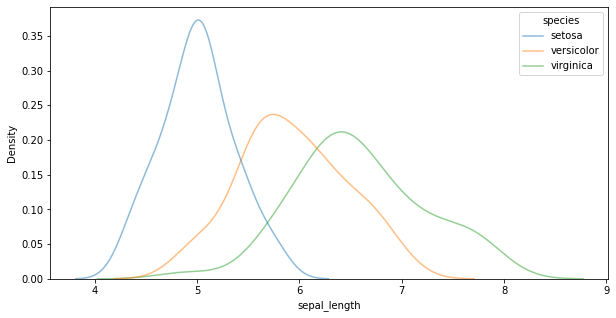

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df, x="sepal_length", hue="species", alpha=0.5, ax=ax)

In [ ]:
from scipy.stats import t

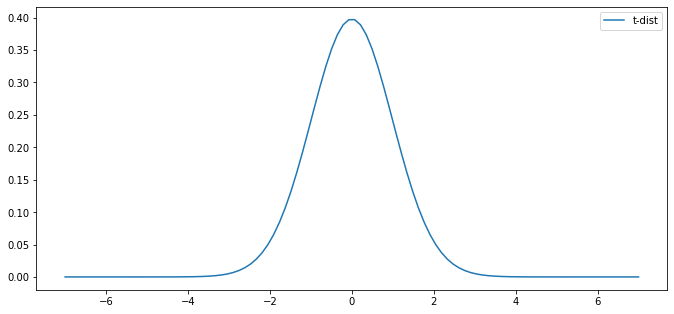

In [ ]:
x_sepal_length = np.linspace(-7, 7, 100)
df_est = len(df.loc[df["species"] == "virginica"]) + len(df.loc[df["species"] == "versicolor"]) - 2

pdf_sepal_length = t.pdf(x_sepal_length, df_est)

# ---------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [ ]:
from scipy.stats import ttest_ind

t_stat = ttest_ind(
    df.loc[df["species"] == "virginica", "sepal_length"],
    df.loc[df["species"] == "versicolor", "sepal_length"]
)
t_stat

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

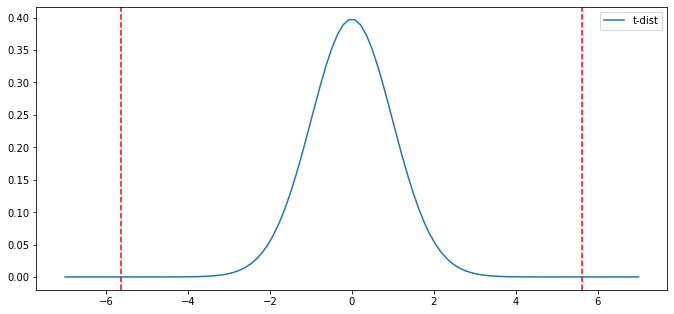

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=-t_stat.statistic, color="red", ls="--")

fig.tight_layout(pad=3.0)

In [ ]:
p_value = 2*(1-t.cdf(t_stat.statistic, df_est))
p_value

1.7248563022320695e-07

In [ ]:
signif = 0.01

t_critic = t.ppf(1-signif, df=df_est)
print(round(t_critic, 5))

2.365


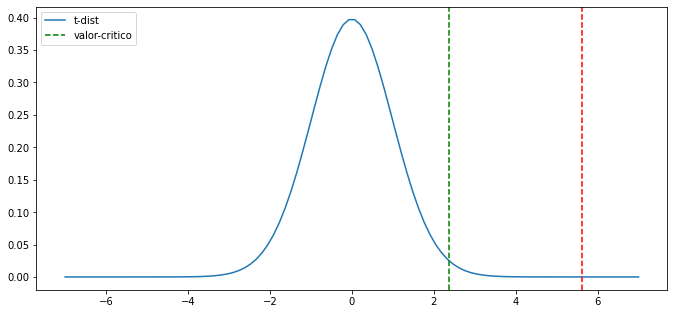

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=t_critic, color="green", ls="--", label="valor-critico")
plt.legend()
fig.tight_layout(pad=3.0)

## Teste de Hipóteses

In [ ]:
df = sns.load_dataset('attention')
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [ ]:
df.describe()

,Unnamed: 0,subject,solutions,score
count,60.000000,60.000000,60.000000,60.000000
mean,29.500000,10.500000,2.000000,5.958333
std,17.464249,5.814943,0.823387,1.621601
min,0.000000,1.000000,1.000000,2.000000
25%,14.750000,5.750000,1.000000,5.000000
50%,29.500000,10.500000,2.000000,6.000000
75%,44.250000,15.250000,3.000000,7.000000
max,59.000000,20.000000,3.000000,9.000000


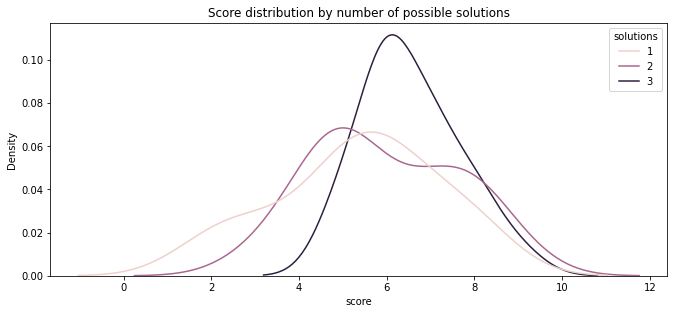

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution by number of possible solutions")
sns.kdeplot(data=df[df["solutions"].isin([1, 2, 3])], x="score", hue="solutions", ax=ax)

fig.tight_layout(pad=3.0)

In [ ]:
df.groupby("solutions")["subject"].count()

solutions
1    20
2    20
3    20
Name: subject, dtype: int64

In [ ]:
ttest_ind(df.query("solutions == 1")['score'], df.query("solutions == 3")['score'])

Ttest_indResult(statistic=-2.5007427468082932, pvalue=0.016823275429255515)

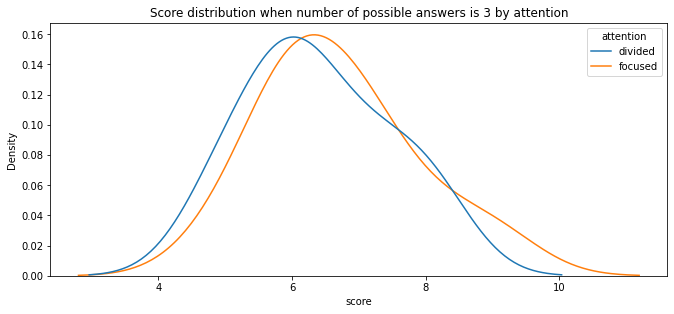

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution when number of possible answers is 3 by attention")
sns.kdeplot(data=df[df["solutions"].isin([3])], x="score", hue="attention", ax=ax)

fig.tight_layout(pad=3.0)

In [ ]:
df["approved"] = (df["score"] >= 6).astype("int")
df.tail()

,Unnamed: 0,subject,attention,solutions,score,approved
55,55,16,focused,3,7.0,1
56,56,17,focused,3,6.0,1
57,57,18,focused,3,6.0,1
58,58,19,focused,3,6.0,1
59,59,20,focused,3,5.0,0


In [ ]:
attention_3_solutions = df[df["solutions"] == 3]

p1 = attention_3_solutions[attention_3_solutions["attention"] == "focused"]["approved"].mean()
p2 = attention_3_solutions[attention_3_solutions["attention"] == "divided"]["approved"].mean()
p = attention_3_solutions["approved"].mean()
n1 = len(attention_3_solutions[attention_3_solutions["attention"] == "focused"])
n2 = len(attention_3_solutions[attention_3_solutions["attention"] == "divided"])

statistic = (p1-p2)/np.sqrt(p*(1-p)*(1/n1+1/n2))
dfn = n1 + n2 - 2

from scipy.stats import t
from scipy.stats import norm

print(f"""
statistic: {statistic}
p-value (t-student): {1 - t.cdf(statistic, df = dfn)}
p-value (normal): {1 - norm.cdf(statistic)}
""")


statistic: 0.6262242910851493
p-value (t-student): 0.26951439315489223
p-value (normal): 0.2655839182730071

